In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('train_house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

<AxesSubplot:>

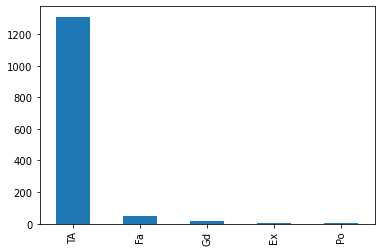

In [9]:
df['GarageQual'].value_counts().plot(kind='bar')

In [10]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

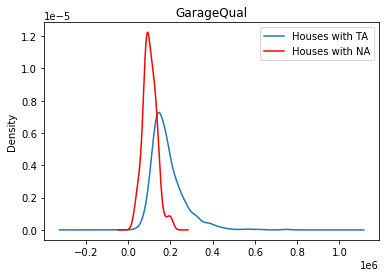

In [17]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [21]:
df[df['GarageQual']=='TA']['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1311, dtype: int64

In [22]:
temp_df = df[df['GarageQual']=='TA']['SalePrice']

In [23]:
df['GarageQual'].fillna('TA', inplace=True)

In [24]:
df['GarageQual'].fillna('TA', inplace=True)

Text(0.5, 1.0, 'GarageQual')

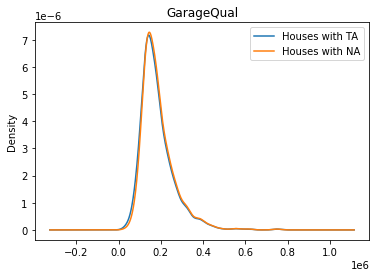

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')
temp_df.plot(kind='kde')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<AxesSubplot:>

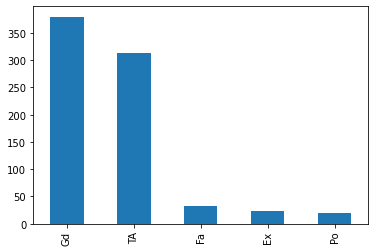

In [35]:
df['FireplaceQu'].value_counts().plot(kind='bar') #Its not a good practice to use the mode value when two groups are comparable

Gd and TA are nearly same so imputing with mode will not give the good results

Text(0.5, 1.0, 'FireplaceQu')

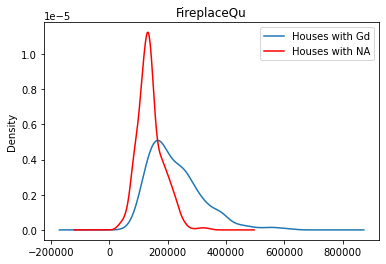

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

<AxesSubplot:>

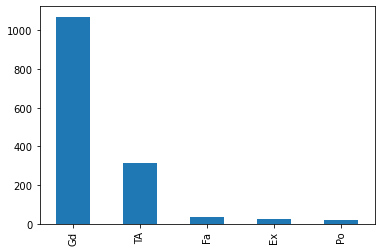

In [37]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

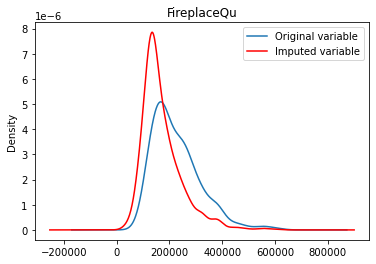

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [33]:
# using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)
imputer.statistics_

array(['Gd', 'TA'], dtype=object)